Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

Read Diabetes Data & EDA

In [ ]:
diabetes_data=pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data.duplicated().any()

False

In [ ]:
diabetes_data.duplicated().sum()

0

In [ ]:
diabetes_data['Glucose'].replace(0,diabetes_data['Glucose'].median(),inplace=True)
diabetes_data['BloodPressure'].replace(0,diabetes_data['BloodPressure'].median(),inplace=True)
diabetes_data['SkinThickness'].replace(0,diabetes_data['SkinThickness'].median(),inplace=True)
diabetes_data['Insulin'].replace(0,diabetes_data['Insulin'].median(),inplace=True)
diabetes_data['BMI'].replace(0,diabetes_data['BMI'].median(),inplace=True)


In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


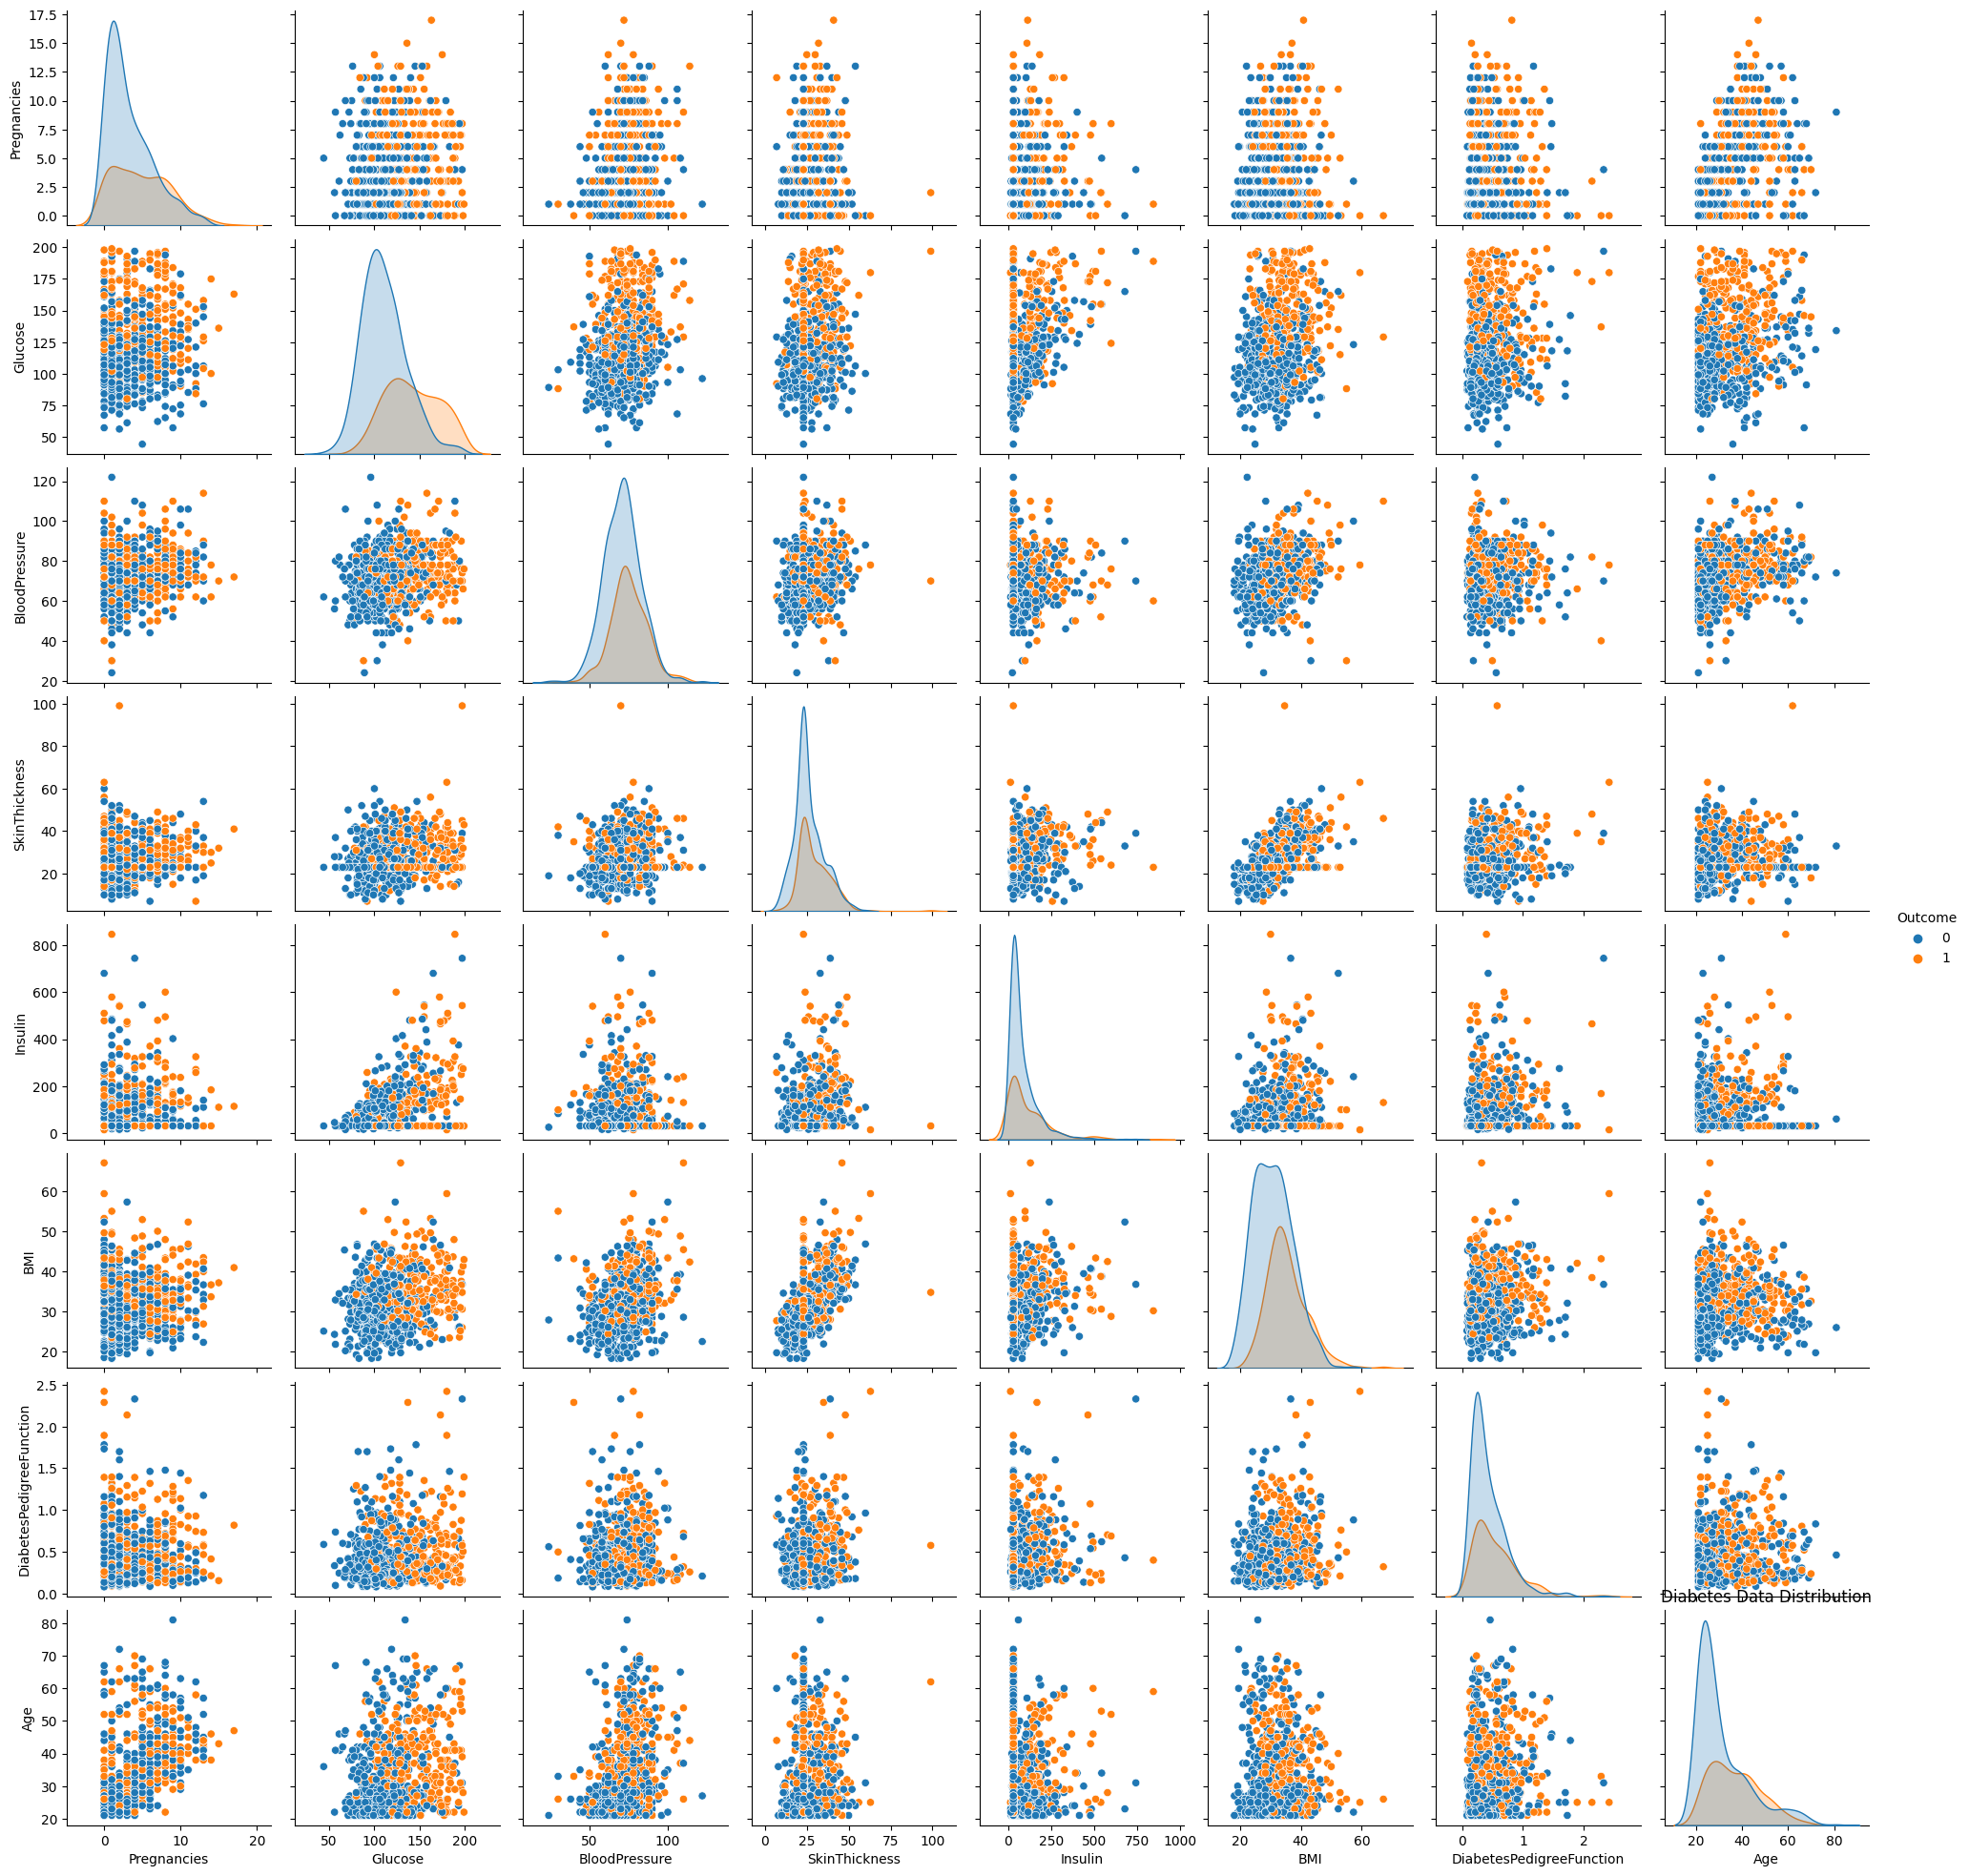

In [ ]:
sns.pairplot(data=diabetes_data,hue='Outcome')
plt.title(label='Diabetes Data Distribution')
plt.show()

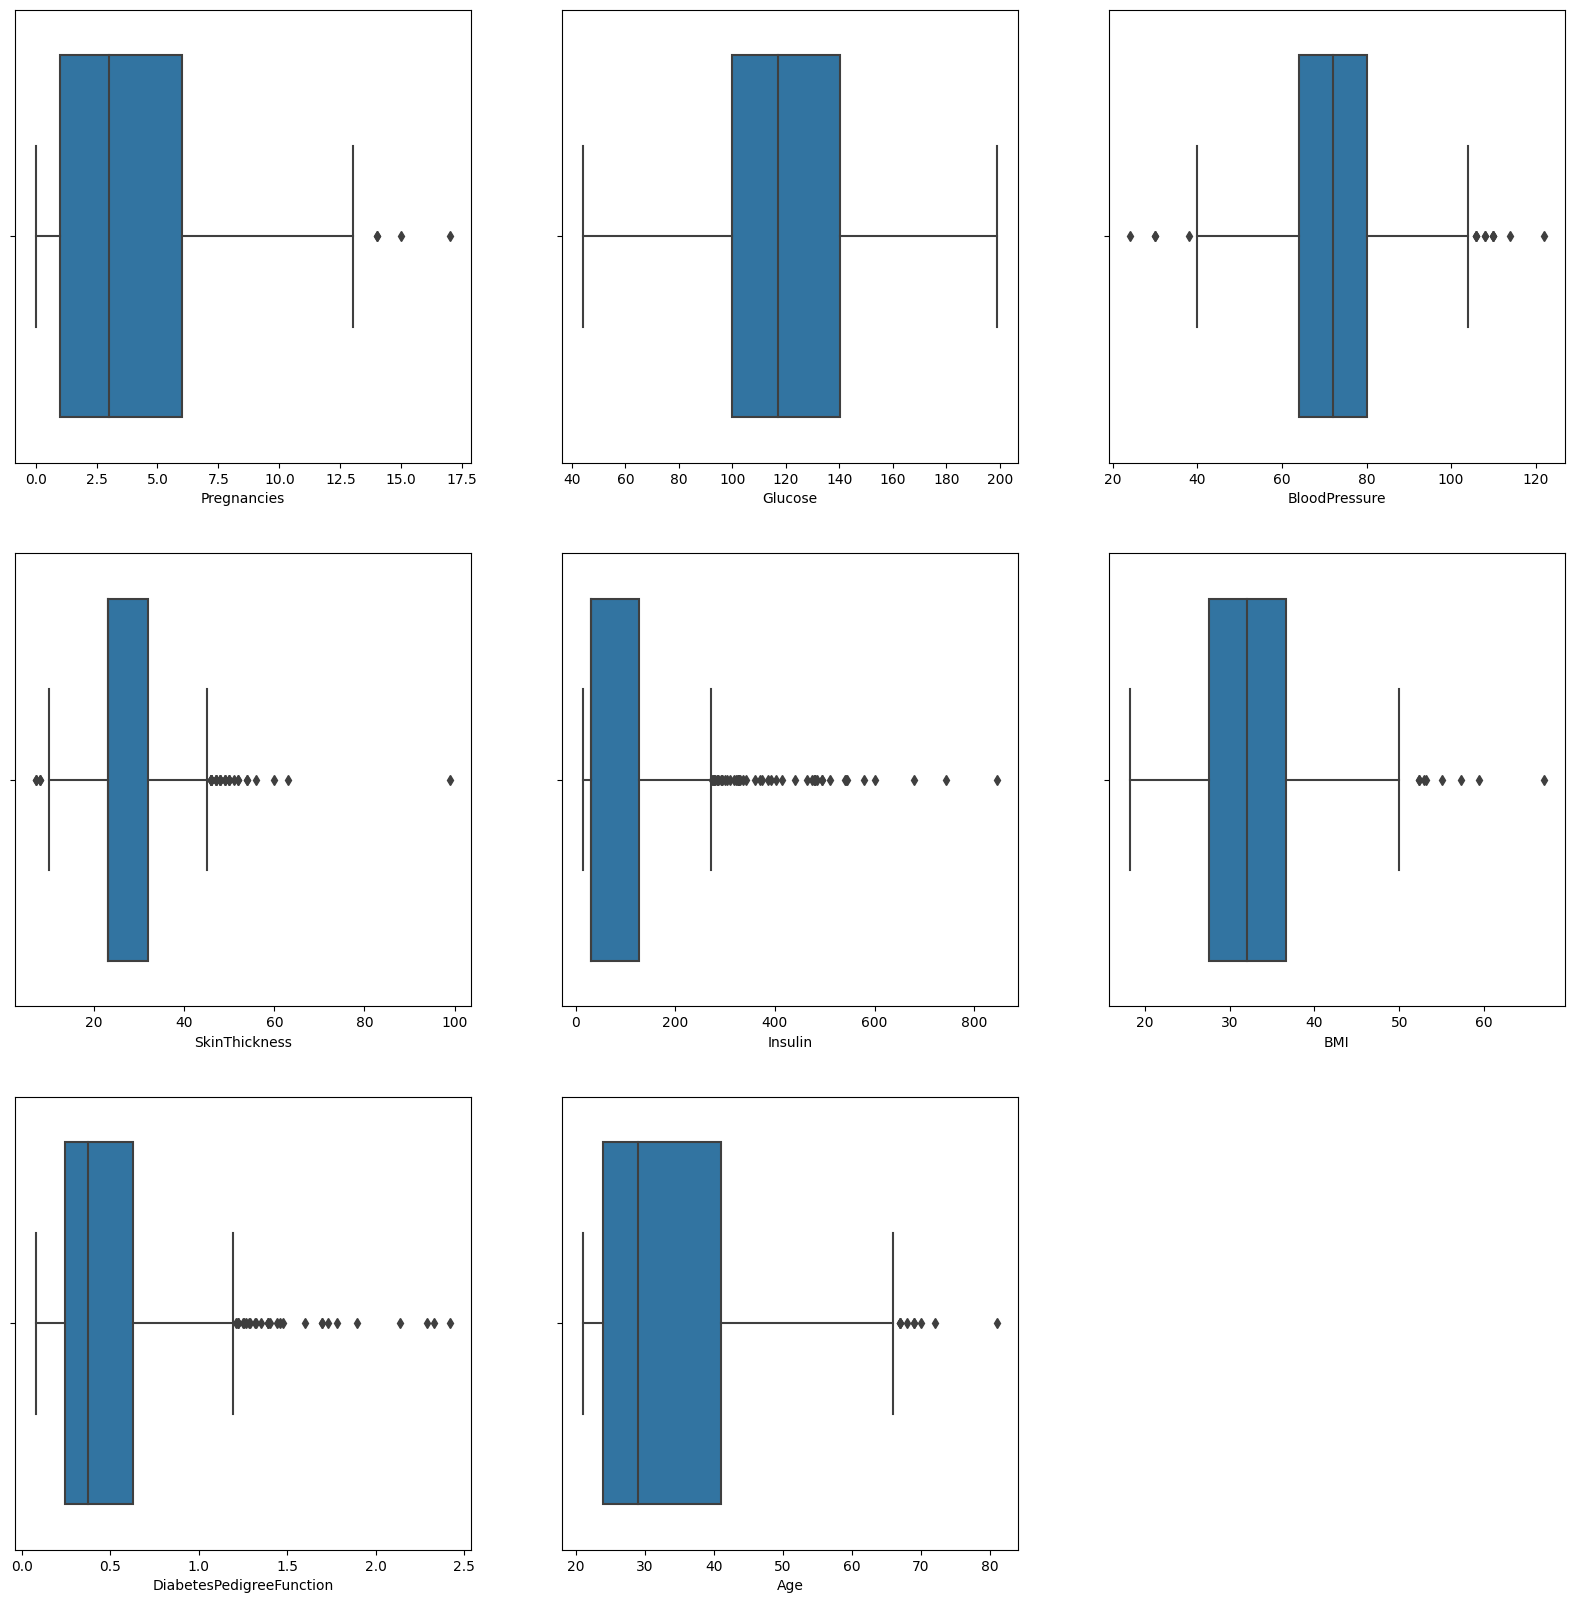

In [ ]:
columns=diabetes_data[['Pregnancies',	'Glucose','BloodPressure','SkinThickness',	'Insulin','BMI',	'DiabetesPedigreeFunction','Age']]

k=1
plt.figure(figsize=(20,20))
for column in columns:
  plt.subplot(3,3,k)
  sns.boxplot(data=columns,x=columns[column])
  k+=1


In [ ]:
correlation=diabetes_data.corr()
correlation. style. background_gradient (cmap = 'BrBG')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


In [ ]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

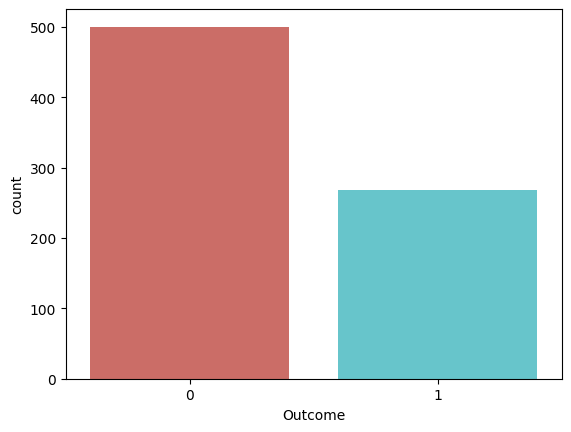

In [ ]:
sns.countplot(data=diabetes_data,x='Outcome',palette='hls')
plt.show()

Train Test split





In [ ]:
y=diabetes_data['Outcome']
x=diabetes_data.drop(columns=['Outcome'])

In [ ]:
x_train,x_test, y_train,y_test=train_test_split(x, y, test_size=0.25, random_state=0)

Data Scaling

In [ ]:
scaler = RobustScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Feature Selection

In [ ]:
mutual_info = mutual_info_classif(x_train_scaled,y_train,random_state=0)
mutual_info1 = pd.Series(mutual_info)
mutual_info1.index = x_train.columns
mutual_info1.sort_values(ascending=False)

Glucose                     0.104960
BMI                         0.076749
Insulin                     0.038278
Age                         0.027600
Pregnancies                 0.019249
SkinThickness               0.003331
BloodPressure               0.000000
DiabetesPedigreeFunction    0.000000
dtype: float64

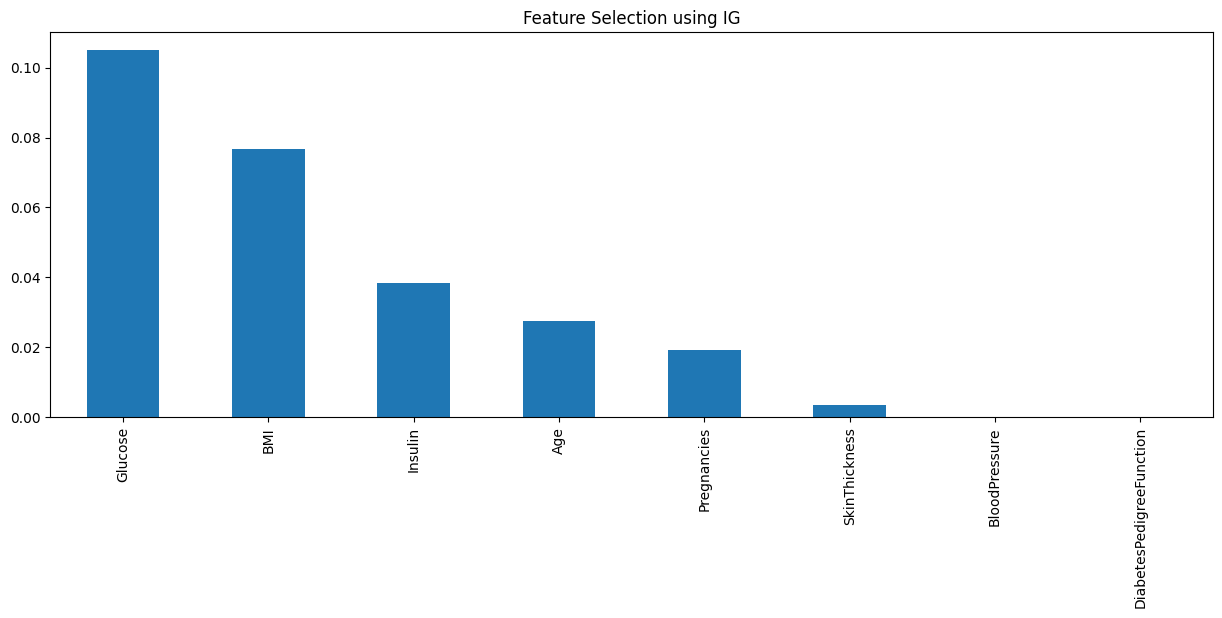

In [ ]:
mutual_info1.sort_values(ascending=False).plot.bar(figsize=(15, 5))
plt.title('Feature Selection using IG')
plt.show()

In [ ]:
x_train_scaled=pd.DataFrame(x_train_scaled)

In [ ]:
x_test_scaled=pd.DataFrame(x_test_scaled)

In [ ]:
X_train_scaled=x_train_scaled.loc[:,[0,1,4,5,7]]

In [ ]:
X_test_scaled=x_test_scaled.loc[:,[0,1,4,5,7]]

Models Part

Decision tree Model with feature selected by IG

In [ ]:
tree_clf = DecisionTreeClassifier(min_samples_split=0.3, random_state=0)
clf = tree_clf.fit(X_train_scaled,y_train)
y_pred = clf.predict(X_test_scaled)


In [ ]:
y_true=clf.predict(X_train_scaled)

In [ ]:
print("Train Accuracy:",metrics.accuracy_score(y_train, y_true))

Train Accuracy: 0.7673611111111112


In [ ]:
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.765625


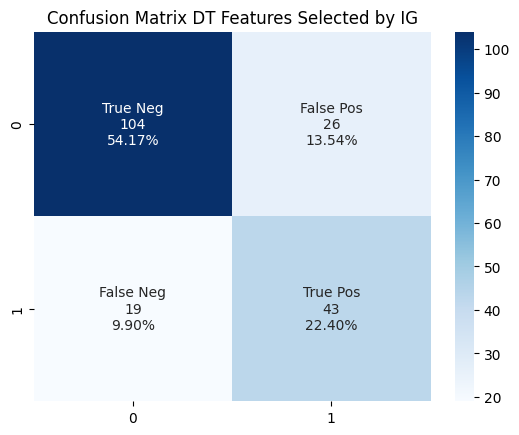

In [ ]:
cm = confusion_matrix(y_test, y_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(labels,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix DT Features Selected by IG")
plt.show()

In [ ]:
auc=np.round(roc_auc_score(y_test, y_pred), 3)
print("Auc for our data is {}".format(auc))

Auc for our data is 0.747


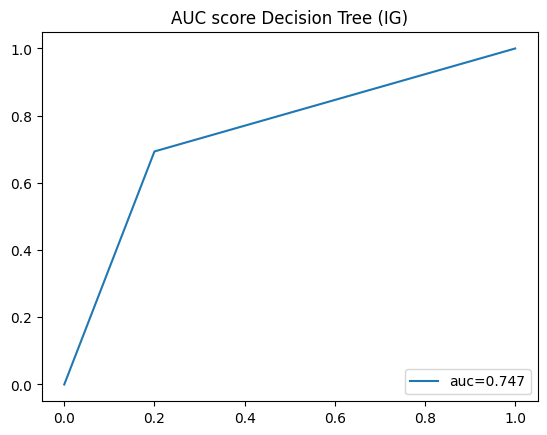

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr,label= "auc="+str(auc))
plt.legend(loc=4)
plt.title("AUC score Decision Tree (IG)")
plt.show()

Decision Tree with all features

In [ ]:
tree__clf = DecisionTreeClassifier(min_samples_leaf=0.3,random_state=0)
classifier = tree__clf.fit(x_train_scaled,y_train)
y_predict = classifier.predict(x_test_scaled)

In [ ]:
y__true=classifier.predict(x_train_scaled)

In [ ]:
print("Train Accuracy:",metrics.accuracy_score(y_train, y__true))

Train Accuracy: 0.7204861111111112


In [ ]:
print("Test Accuracy:",metrics.accuracy_score(y_test, y_predict))

Test Accuracy: 0.7239583333333334


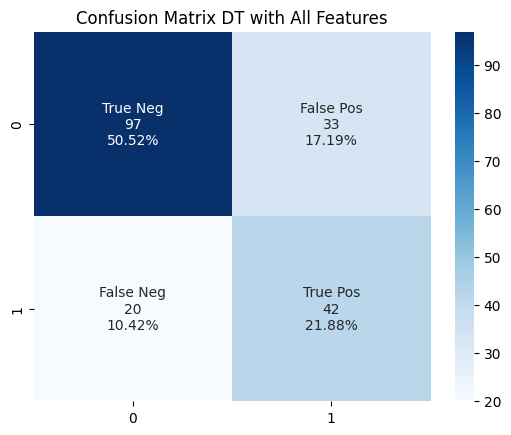

In [ ]:
cm1 = confusion_matrix(y_test, y_predict)

labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm1.flatten()/np.sum(cm1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(labels,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix DT with All Features")
plt.show()

In [ ]:
AUC=np.round(roc_auc_score(y_test, y_predict), 3)
print("Auc for our data is {}".format(AUC))

Auc for our data is 0.712


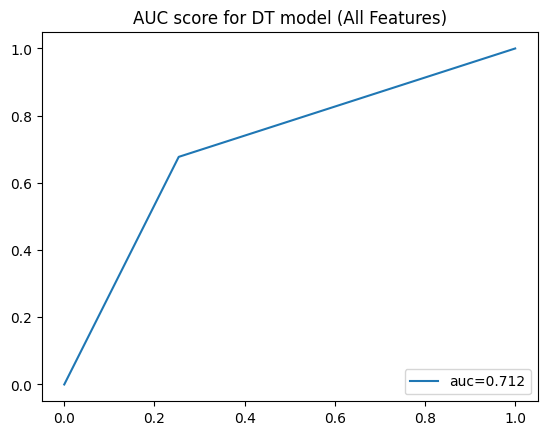

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
plt.plot(fpr,tpr,label= "auc="+str(AUC))
plt.title("AUC score for DT model (All Features)")
plt.legend(loc=4)
plt.show()

KNN Model with All Features

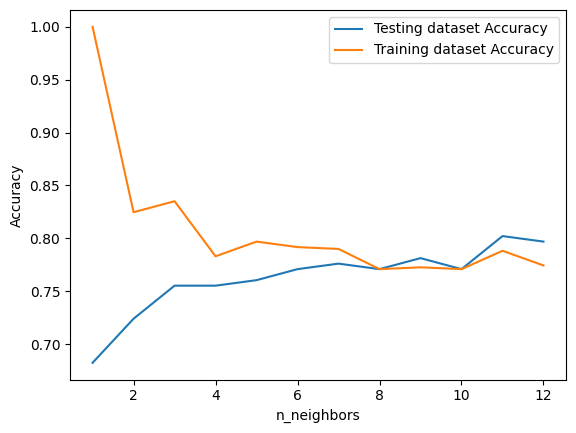

In [ ]:
neighbors = np.arange(1, 13)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train_scaled, y_train)
    test_accuracy[i] = knn.score(x_test_scaled, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn_class = KNeighborsClassifier(n_neighbors=7)
knn_class.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn_ypredicted=knn_class.predict(x_test_scaled)
knn_train_predicted=knn_class.predict(x_train_scaled)
print("train Accuracy:",metrics.accuracy_score(y_train, knn_train_predicted))
print("Test Accuracy :",metrics.accuracy_score(y_test, knn_ypredicted))

train Accuracy: 0.7899305555555556
Test Accuracy : 0.7760416666666666


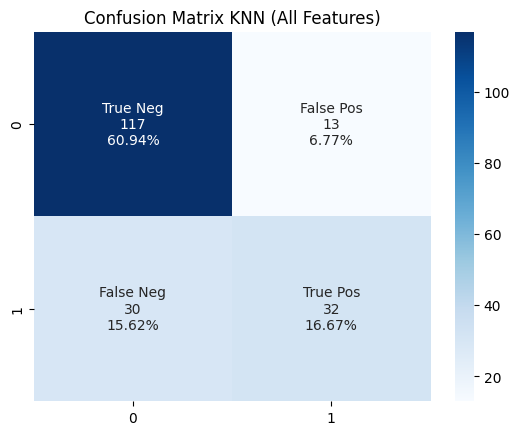

In [ ]:
knncm = confusion_matrix(y_test, knn_ypredicted)

labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                knncm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     knncm.flatten()/np.sum(knncm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(labels,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(knncm, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix KNN (All Features)")
plt.show()

Auc for our data is 0.708


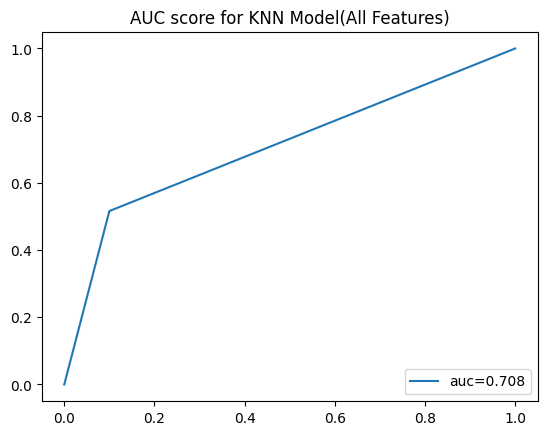

In [ ]:
Knn_AUC=np.round(roc_auc_score(y_test, knn_ypredicted), 3)
print("Auc for our data is {}".format(Knn_AUC))
fpr, tpr, _ = metrics.roc_curve(y_test,  knn_ypredicted)
plt.plot(fpr,tpr,label= "auc="+str(Knn_AUC))
plt.title("AUC score for KNN Model(All Features)")
plt.legend(loc=4)
plt.show()

K-Nearest Neighbor Model with features selected by IG

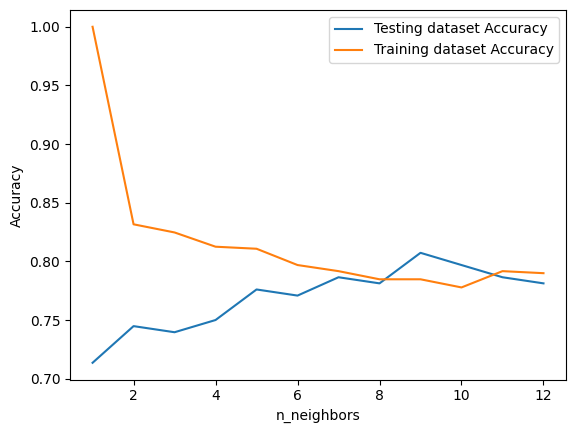

In [ ]:
neighbors = np.arange(1, 13)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train_scaled, y_train)
    test_accuracy[i] = knn.score(X_test_scaled, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn_y_predicted=knn.predict(X_test_scaled)

In [ ]:
knntrain_predicted=knn.predict(X_train_scaled)

In [ ]:
print("train Accuracy:",metrics.accuracy_score(y_train, knntrain_predicted))

train Accuracy: 0.7916666666666666


In [ ]:
print("Test Accuracy :",metrics.accuracy_score(y_test, knn_y_predicted))

Test Accuracy : 0.7864583333333334


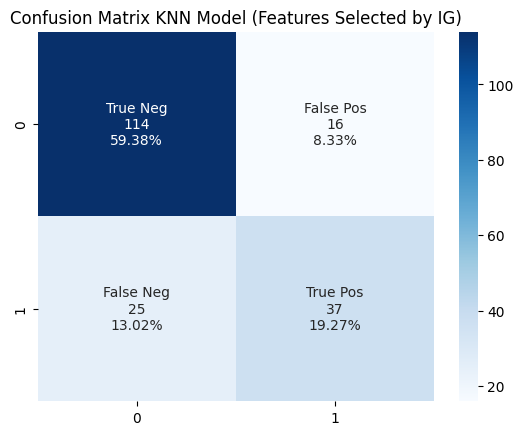

In [ ]:
knn_cm = confusion_matrix(y_test, knn_y_predicted)

labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                knn_cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     knn_cm.flatten()/np.sum(knn_cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(labels,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(knn_cm, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix KNN Model (Features Selected by IG)")
plt.show()

In [ ]:
KNN_AUC=np.round(roc_auc_score(y_test, knn_y_predicted), 3)
print("Auc for our data is {}".format(KNN_AUC))

Auc for our data is 0.737


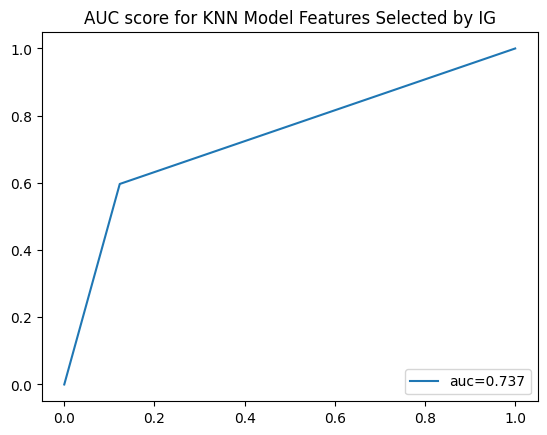

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  knn_y_predicted)
plt.plot(fpr,tpr,label= "auc="+str(KNN_AUC))
plt.title("AUC score for KNN Model Features Selected by IG")
plt.legend(loc=4)
plt.show()

Logistic Regression All Features

In [ ]:
logisticreg = LogisticRegression(C=0.3,random_state=0)
logisticreg.fit(x_train_scaled, y_train)

LogisticRegression(C=0.3, random_state=0)

In [ ]:
logpred=logisticreg.predict(x_train_scaled)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logisticreg.score(x_train_scaled, y_train)))

Accuracy of logistic regression classifier on train set: 0.77


In [ ]:
logesticpred = logisticreg.predict(x_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticreg.score(x_test_scaled, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


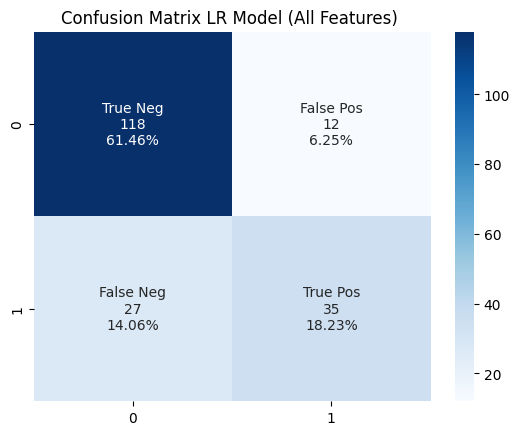

In [ ]:
logcm = confusion_matrix(y_test, logesticpred)

labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                logcm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     logcm.flatten()/np.sum(logcm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(labels,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(logcm, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix LR Model (All Features) ")
plt.show()

In [ ]:
logesticAUC=np.round(roc_auc_score(y_test, logesticpred), 3)
print("Auc for our data is {}".format(logesticAUC))

Auc for our data is 0.736


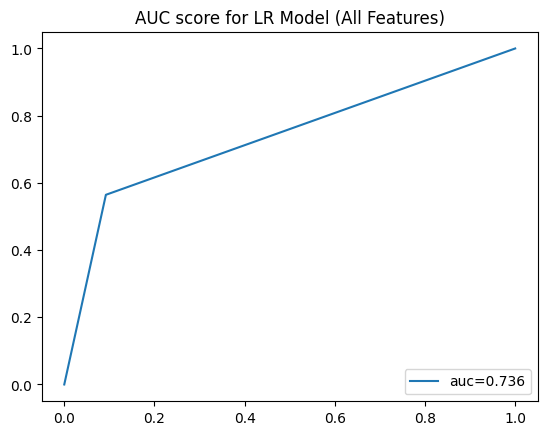

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  logesticpred)
plt.plot(fpr,tpr,label= "auc="+str(logesticAUC))
plt.title("AUC score for LR Model (All Features)")
plt.legend(loc=4)
plt.show()

Logistic Regression With IG

In [ ]:
logreg = LogisticRegression(C=0.3,random_state=0)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.3, random_state=0)

In [ ]:
log_pred=logreg.predict(X_train_scaled)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train_scaled, y_train)))

Accuracy of logistic regression classifier on train set: 0.77


In [ ]:
logestic_pred = logreg.predict(X_test_scaled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_scaled, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


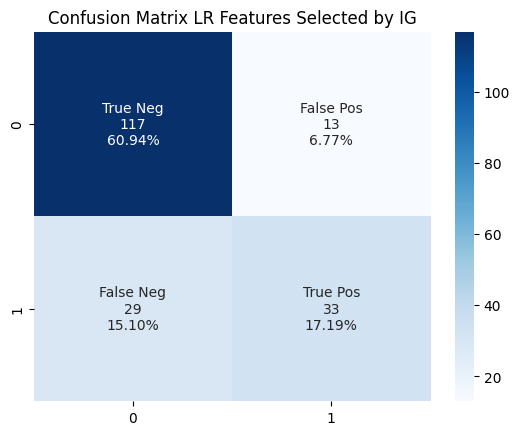

In [ ]:
log_cm = confusion_matrix(y_test, logestic_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                log_cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     log_cm.flatten()/np.sum(log_cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(labels,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(log_cm, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix LR Features Selected by IG")
plt.show()

In [ ]:
logestic_AUC=np.round(roc_auc_score(y_test, logestic_pred), 3)
print("Auc for our data is {}".format(logestic_AUC))

Auc for our data is 0.716


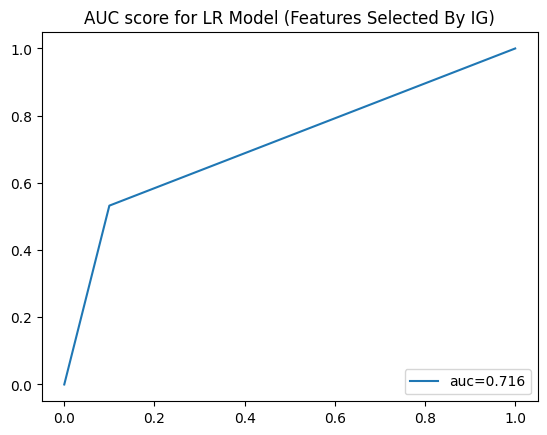

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  logestic_pred)
plt.plot(fpr,tpr,label= "auc="+str(logestic_AUC))
plt.title("AUC score for LR Model (Features Selected By IG)")
plt.legend(loc=4)
plt.show()